/tmp/ipykernel_2439703/3479592398.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_single['type'] = 'Fortran (1 thread)'
/tmp/ipykernel_2439703/3479592398.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_multi['type'] = 'Fortran (32 threads)'
/tmp/ipykernel_2439703/3479592398.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

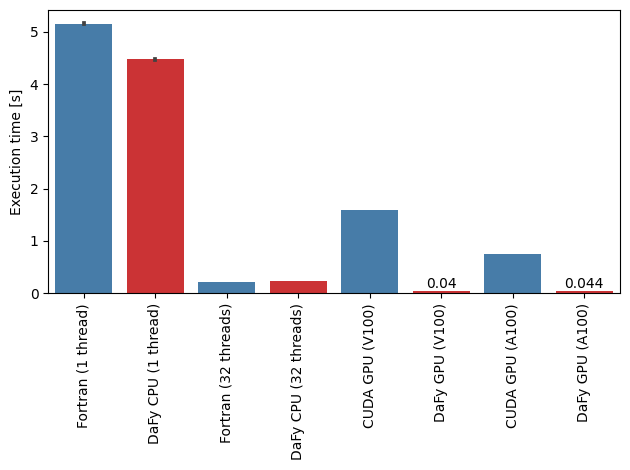

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# dace_cpu = pd.read_csv('dace_cpu.csv')
# dace_gpu = pd.read_csv('dace_gpu.csv')
# fortran_cpu = pd.read_csv('fortran_cpu.csv')
# fortran_openacc = pd.read_csv('fortran_openacc.csv')
# c_cpu = pd.read_csv('c_cpu.csv')
# c_cuda = pd.read_csv('c_cuda.csv')

df = pd.read_csv('microbenchmark_pi_new.csv')
size_filter = df[df['size'] == df['size'].max()]


color = sns.color_palette("Set1", 2)
color = [color[1], color[0]]

baseline_single = size_filter[np.logical_and(size_filter['type'] == 'baseline', size_filter['threads'] == 1)]
baseline_multi = size_filter[np.logical_and(size_filter['type'] == 'baseline', size_filter['threads'] == 32)]
baseline_single['type'] = 'Fortran (1 thread)'
baseline_multi['type'] = 'Fortran (32 threads)'
baseline_gpu_v100 = size_filter[size_filter['type'] == 'baseline_v100']
baseline_gpu_v100['type'] = 'CUDA GPU (V100)'
baseline_gpu_a100 = size_filter[size_filter['type'] == 'baseline_a100']
baseline_gpu_a100['type'] = 'CUDA GPU (A100)'

dace_cpu_single = size_filter[np.logical_and(size_filter['type'] == 'dace_cpu', size_filter['threads'] == 1)]
dace_cpu_multi = size_filter[np.logical_and(size_filter['type'] == 'dace_cpu', size_filter['threads'] == 32)]
dace_cpu_single['type'] = 'DaFy CPU (1 thread)'
dace_cpu_multi['type'] = 'DaFy CPU (32 threads)'
dace_gpu = size_filter[size_filter['type'] == 'dace_gpu_v100']
dace_gpu['type'] = 'DaFy GPU (V100)'
dace_gpu2 = size_filter[size_filter['type'] == 'dace_gpu_a100']
dace_gpu2['type'] = 'DaFy GPU (A100)'

for d in [dace_cpu_single, dace_cpu_multi, dace_gpu, dace_gpu2]:
    d['execution_time'] = d['execution_time'] / 1000

# df_all = pd.concat([dace_cpu_single, dace_cpu_multi, fortran_cpu_single, fortran_cpu_multi, c_cpu_single, c_cpu_multi, dace_gpu, fortran_openacc, c_cuda])
df_all = pd.concat([baseline_single, dace_cpu_single, baseline_multi, dace_cpu_multi, baseline_gpu_v100, dace_gpu, baseline_gpu_a100,  dace_gpu2])

g = sns.barplot(data=df_all, x="type", y="execution_time", palette=color)
g.set_ylabel('Execution time [s]')
g.set_xlabel('')
g.tick_params(axis='x', rotation=90)

rects = g.patches
# Make some labels.
#labels = [f"label{i}" for i in range(len(rects))]
label_v100 = round(dace_gpu.mean()['execution_time'], 3)
label_a100 = round(dace_gpu2.mean()['execution_time'], 3)
#for rect, label in zip(rects, labels):

rect = rects[5]
height = rect.get_height()
g.text(
    rect.get_x() + rect.get_width() / 2, height, label_v100, ha="center", va="bottom"
)
rect = rects[7]
height = rect.get_height()
g.text(
    rect.get_x() + rect.get_width() / 2, height, label_a100, ha="center", va="bottom"
)


fig = g.get_figure()
fig.tight_layout()
plt.show()
fig.savefig('fig_pi.pdf', bbox_inches='tight')


In [25]:

baseline_gpu_v100
print(df.groupby(['type', 'threads', 'size']).mean().to_string())

                                  Unnamed: 0  repetition  execution_time
type          threads size                                              
baseline      1       1000000000      343.90         9.5        2.578895
                      1250000000      234.70         9.5        3.222749
                      1500000000      325.60         9.5        3.868509
                      1750000000      315.20         9.5        4.512765
                      2000000000      405.10         9.5        5.156786
              2       1000000000      334.25         9.5        1.740070
                      1250000000      323.50         9.5        2.174644
                      1500000000      294.70         9.5        2.609719
                      1750000000      280.10         9.5        3.044440
                      2000000000      277.15         9.5        3.479169
              4       1000000000      275.20         9.5        0.869810
                      1250000000      311.75       